# Iris

The objective of this notebook is to predict the class of iris plant.

The dataset is from sklearn.datasets.

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.style.use("bmh")

In [2]:
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df["Class"] = iris_data.target

In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris_df.shape

(150, 5)

In [5]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Notes:
* The dataset contains 3 classes of iris and 50 instances of each class.
* Classes:
  * 0: Setosa
  * 1: Versicolor
  * 2: Virginica

In [6]:
# check missing data
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Class                0
dtype: int64

There aren't missing values in this dataset.

Let's see how the variables relate to each other.

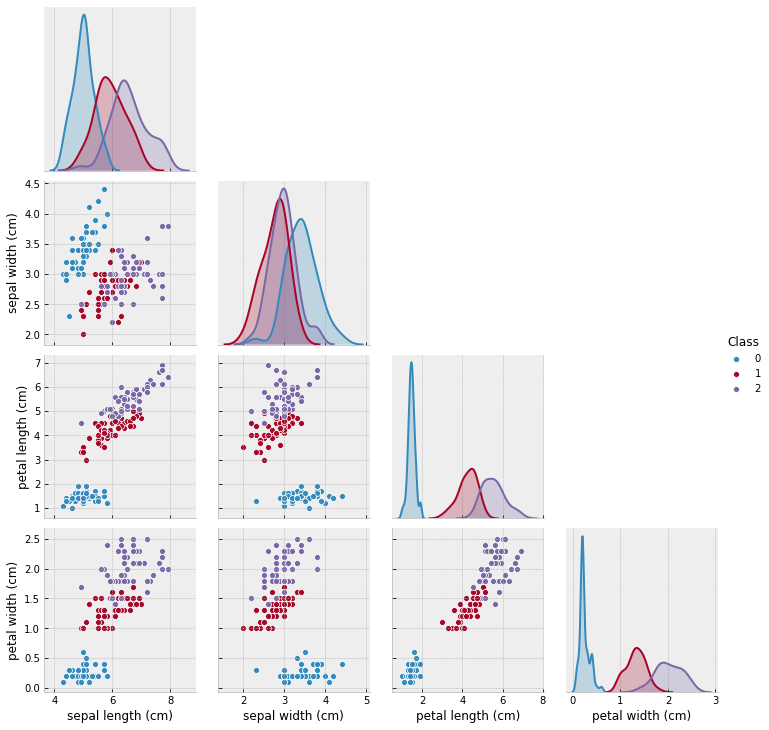

In [7]:
sns.pairplot(iris_df, hue="Class", corner=True)

In [8]:
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Class                  int32
dtype: object

Since every column is numeric, I won't make changes.

In [9]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
# Split data

In [11]:
iris_data_X = iris_data.data
iris_data_X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [12]:
iris_data_y = iris_data.target
iris_data_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
Xtrain, Xtest, ytrain, ytest = train_test_split(iris_data_X, iris_data_y, test_size=0.3, random_state=2)

Since this is a supervised learning problem, I will try Linear Regression, Logistic Regression, SVC, GaussianNB, DecisionTreeClassifier and RandomForestClassifier.

In [14]:
lrparam = {"fit_intercept": [True, False], "normalize": [True, False], "copy_X": [True, False]}
lrgrid = GridSearchCV(LinearRegression(), lrparam, cv=10)
lrgrid.fit(Xtrain, ytrain)
print("Best Linear Regression score:", lrgrid.best_score_)
print("Best Linear Regression estimator:", lrgrid.best_estimator_)

Best Linear Regression score: 0.877530169571286
Best Linear Regression estimator: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [15]:
logrparam = {"penalty": ["l1", "l2"], "solver": ["liblinear"], "C": np.linspace(0.00002, 1, 100)}
logrrand = RandomizedSearchCV(LogisticRegression(max_iter=1000), logrparam, cv=5, n_iter=15, scoring="accuracy")
logrrand.fit(Xtrain, ytrain)
print("Best Logistic Regression score:", logrrand.best_score_)
print("Best Logistic Regression estimator:", logrrand.best_estimator_)

Best Logistic Regression score: 0.9523809523809523
Best Logistic Regression estimator: LogisticRegression(C=0.9898991919191918, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [16]:
svcparam = {"C": [0.1, 1, 10, 100, 1000], "kernel": ["rbf", "linear", "poly", "sigmoid"]}
svcgrid = GridSearchCV(SVC(), svcparam, cv=5, scoring="accuracy")
svcgrid.fit(Xtrain, ytrain)
print("Best SVC score:", svcgrid.best_score_)
print("Best SVC estimator:", svcgrid.best_estimator_)

Best SVC score: 0.9714285714285713
Best SVC estimator: SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [17]:
gnbparam = {"var_smoothing": np.logspace(0, -9, num=100)}
gnbgrid = GridSearchCV(GaussianNB(), gnbparam, cv=10, scoring="accuracy")
gnbgrid.fit(Xtrain, ytrain)
print("Best GaussianNB score:", gnbgrid.best_score_)
print("Best GaussianNB estimator:", gnbgrid.best_estimator_)

Best GaussianNB score: 0.9518181818181819
Best GaussianNB estimator: GaussianNB(priors=None, var_smoothing=0.02848035868435802)


In [18]:
dtparam = {"max_depth": [3, None], "max_features": randint(1, 4), "criterion": ["gini", "entropy"]}
dtrand = RandomizedSearchCV(DecisionTreeClassifier(), dtparam, cv=5, n_iter=15, scoring="accuracy")
dtrand.fit(Xtrain, ytrain)
print("Best DecisionTreeClassifier score:", dtrand.best_score_)
print("Best DecisionTreeClassifier estimator:", dtrand.best_estimator_)

Best DecisionTreeClassifier score: 0.9619047619047618
Best DecisionTreeClassifier estimator: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [19]:
rfparam = {"n_estimators": [int(x) for x in np.linspace(200, 2000, 10)], "max_features": ["log2", "sqrt", "auto"],
           "criterion": ["entropy", "gini"], "max_depth": [int(x) for x in np.linspace(10, 110, 11)],
           "min_samples_split": [2, 3, 5, 10], "min_samples_leaf": [1, 2, 4, 5, 8], "bootstrap": [True, False]}
rfrand = RandomizedSearchCV(RandomForestClassifier(), rfparam, cv=5, n_iter=5, scoring="accuracy")
rfrand.fit(Xtrain, ytrain)
print("Best RandomForestClassifier score:", rfrand.best_score_)
print("Best RandomForestClassifier estimator:", rfrand.best_estimator_)

Best RandomForestClassifier score: 0.9619047619047618
Best RandomForestClassifier estimator: RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


The best estimator is SVC.

In [20]:
prediction = svcgrid.best_estimator_.predict(Xtest)

Text(86.90000000000006, 0.5, 'True value')

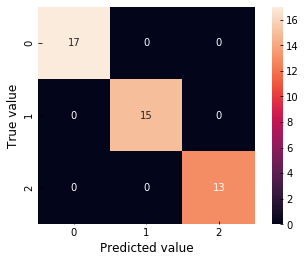

In [21]:
mat = confusion_matrix(ytest, prediction)
sns.heatmap(mat, square=True, annot=True)
plt.xlabel("Predicted value")
plt.ylabel("True value")